# Data Project - Stock Market Analysis 



# 1. the change in price of the stock overtime



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL']

end = datetime.now()
print ('end',end)

start = datetime(end.year - 1, end.month, end.day)
print ('start',start)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


end 2022-11-25 22:22:46.665014
start 2021-11-25 00:00:00
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name): #creat company_name column
    company["company_name"] = com_name


df = pd.concat(company_list, axis=0)

In [4]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800,APPLE
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100,APPLE
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300,APPLE
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300,APPLE
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400,APPLE
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600,APPLE
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100,APPLE
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100,APPLE
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58237000,APPLE


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.905167,76959800,APPLE
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315384,88748200,APPLE
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100,APPLE
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819229,152052500,APPLE
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.815063,136739200,APPLE
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.906143,118023100,APPLE
2021-12-06,164.289993,167.880005,164.279999,165.320007,164.366058,107497000,APPLE
2021-12-07,169.080002,171.580002,168.339996,171.179993,170.192245,120405400,APPLE
2021-12-08,172.130005,175.960007,170.699997,175.080002,174.069748,116998900,APPLE


In [6]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,157.934702,160.124048,155.881151,158.076213,157.526397,9.086097e+07
std,12.867185,12.687927,12.900898,12.797456,12.588606,2.632666e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,2.252794e+07
25%,147.162502,149.747501,145.177502,147.997498,147.885014,7.340735e+07
50%,159.114998,160.855003,155.889999,157.960007,157.473511,8.638125e+07
75%,169.232502,171.057503,167.220001,168.970005,168.350849,1.024875e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.954327e+08


In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-26 to 2022-11-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


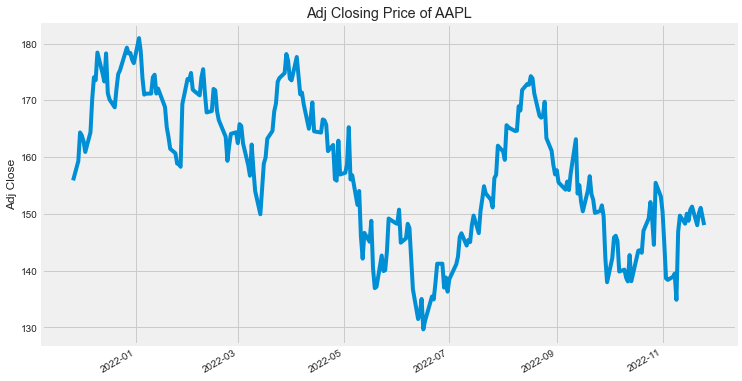

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(30, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Adj Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()

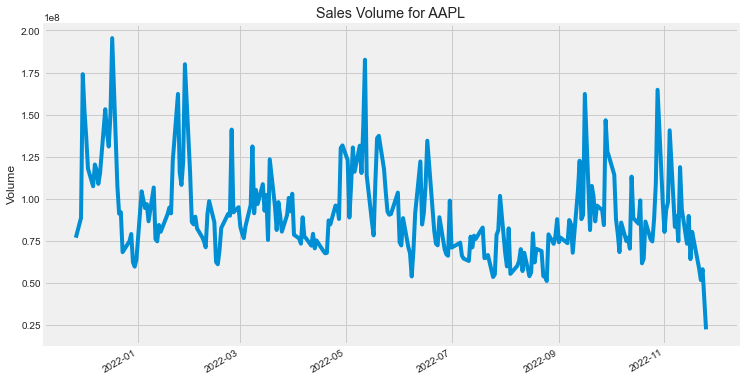

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(30, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2.the moving average of the various stocks

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [11]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

In [12]:
#df.groupby("company_name").hist(figsize=(12, 12));

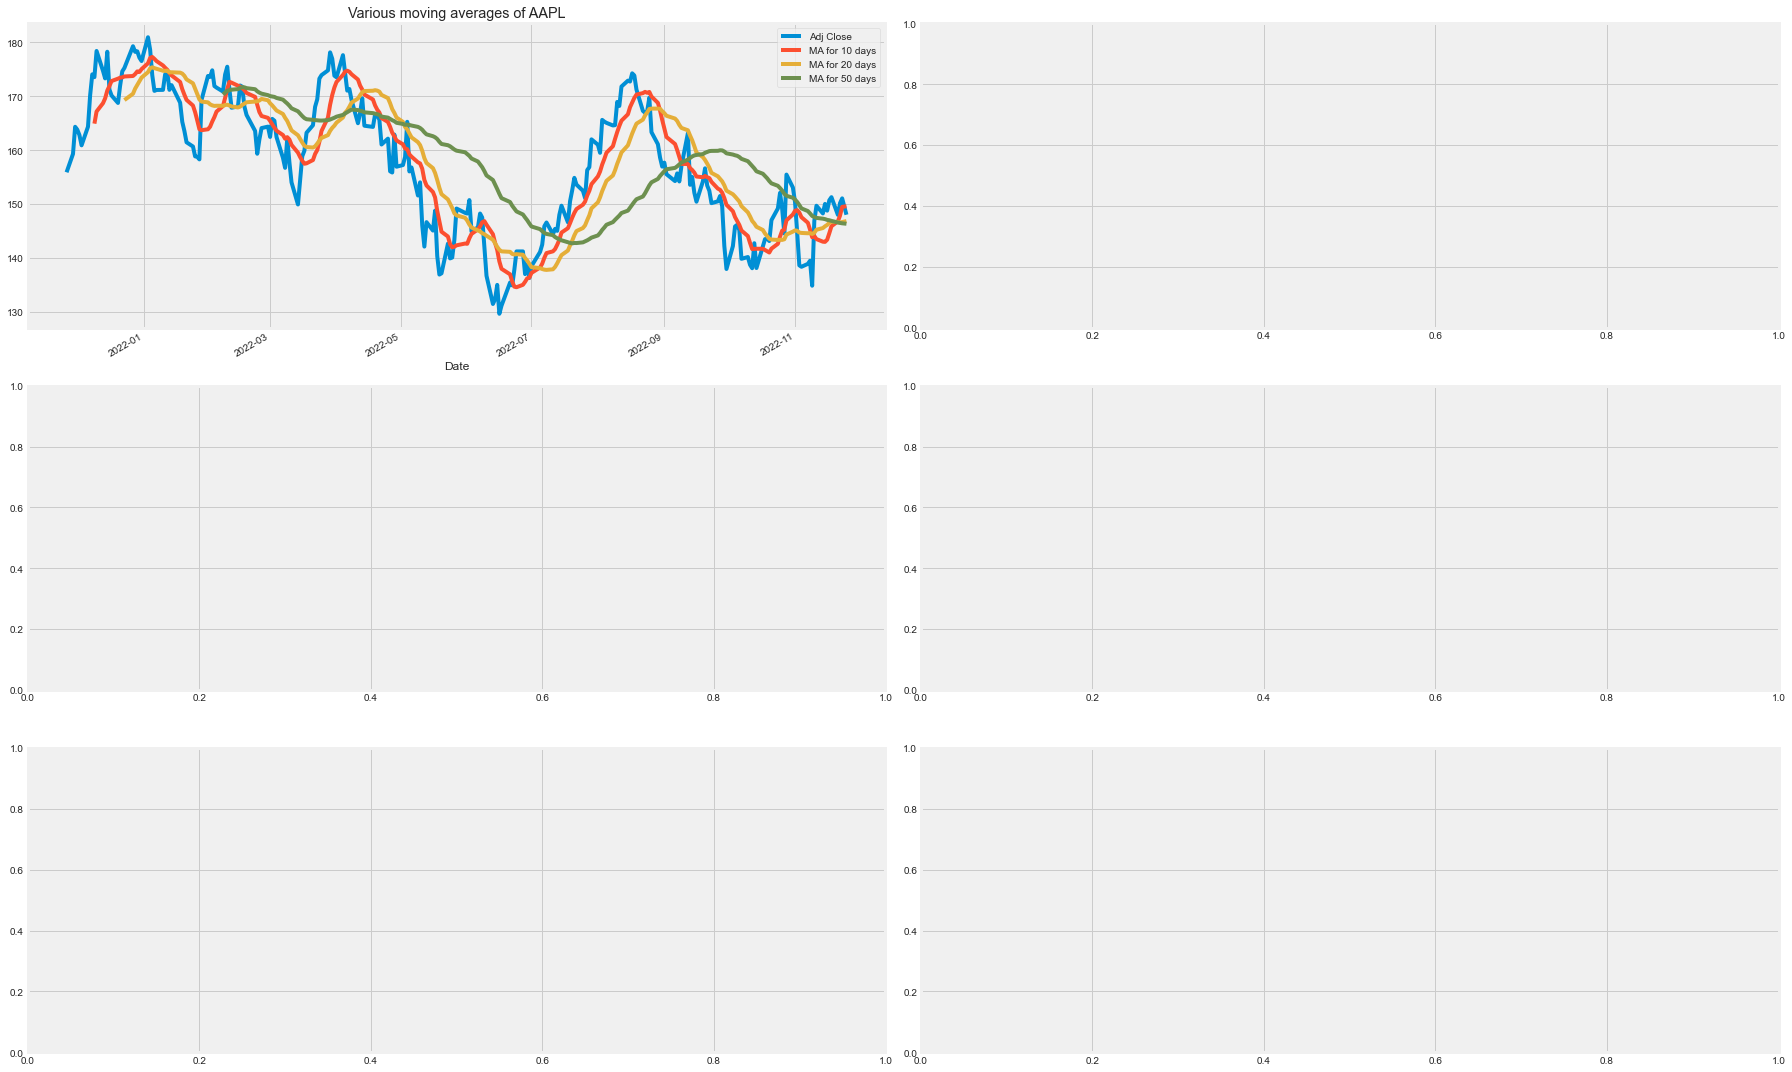

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(25)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Various moving averages of AAPL')


fig.tight_layout()

# 3. the daily return of the stock on average

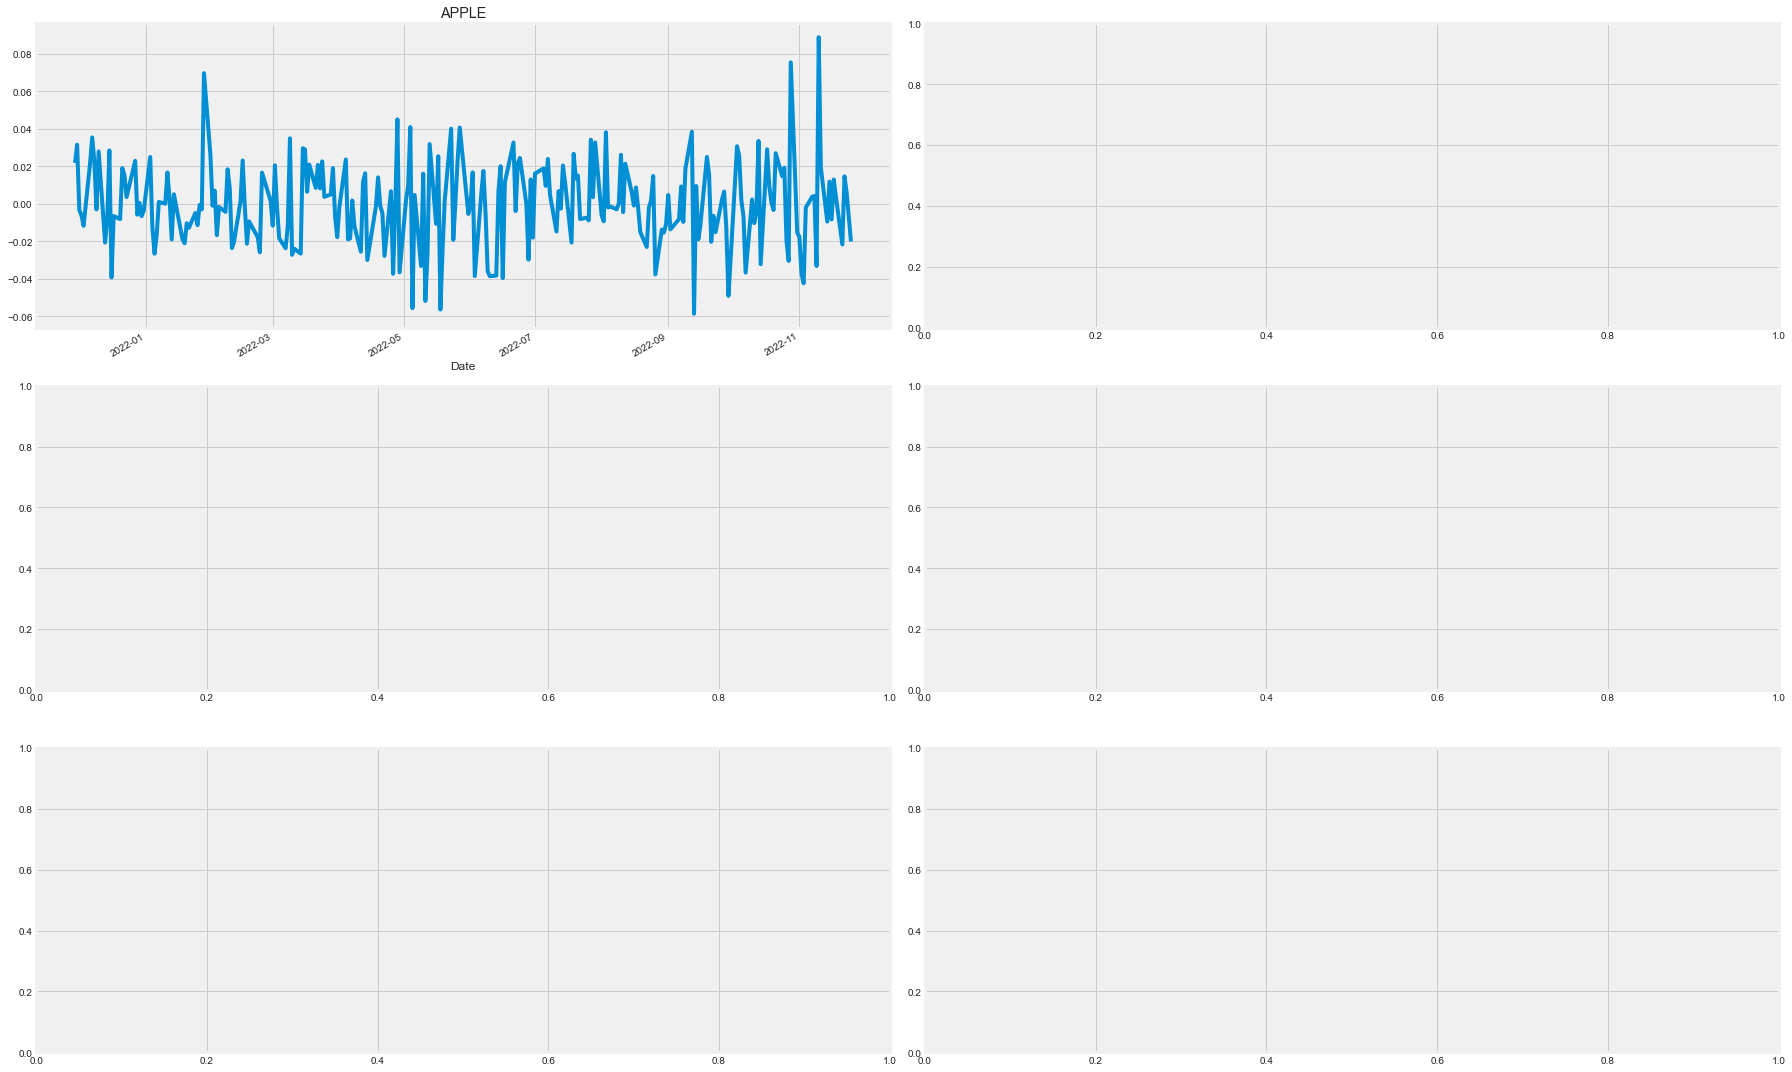

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(25)

AAPL['Daily Return'].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')



fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

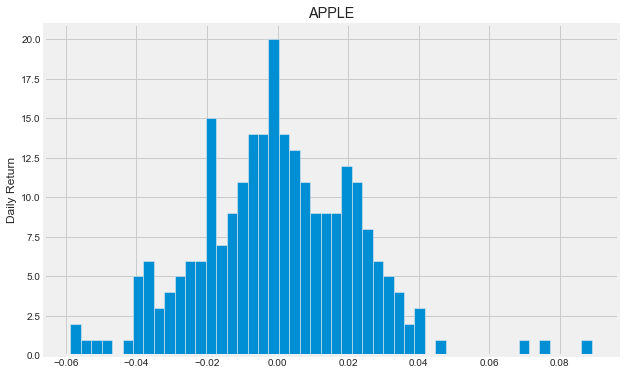

In [15]:
plt.figure(figsize=(25, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. the correlation between different stocks closing prices

DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.tail(10) 

Symbols,AAPL
Date,
2022-11-11,149.699997
2022-11-14,148.279999
2022-11-15,150.039993
2022-11-16,148.789993
2022-11-17,150.720001
2022-11-18,151.289993
2022-11-21,148.009995
2022-11-22,150.179993
2022-11-23,151.070007


In [17]:
closing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-11-24 to 2022-11-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [18]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL
Date,
2021-11-24,NaN
2021-11-26,-0.031678
2021-11-29,0.021874
2021-11-30,0.031578
2021-12-01,-0.003206


In [21]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519278
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726291
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859331
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936


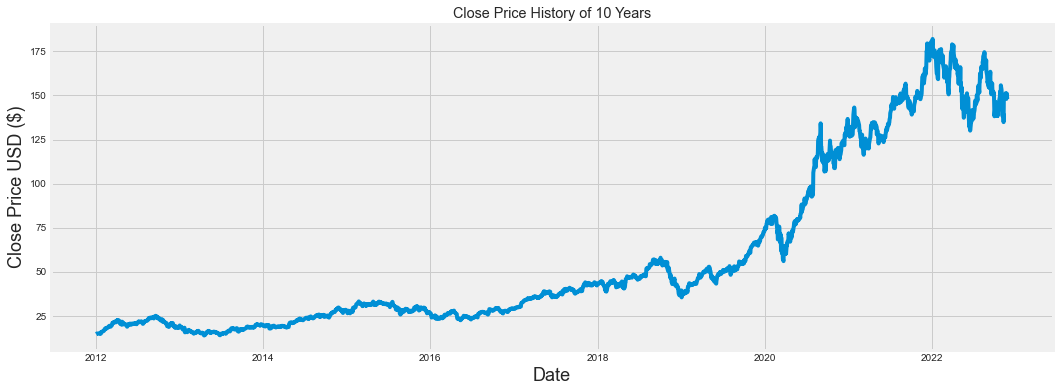

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History of 10 Years')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

window_size = 60
training_data_len

2607